# DataCamp course notes

## Statistical Thinking in Python (Part 1): 

## Quantitative exploratory data analysis


In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris.shape

(150, 6)

In [6]:
iris = iris.rename(columns={'Id': 'id', 'SepalLengthCm': 'sepal_length', 'SepalWidthCm': 'sepal_width', 'PetalLengthCm':'petal_length', 'PetalWidthCm':'petal_width','Species':'species'})

In [7]:
iris['species'] = iris.species.map({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor','Iris-virginica':'virginica'})

In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Calculate 
* mean
* median
* percentiles

In [9]:
np.mean(iris.sepal_length)

5.843333333333335

In [10]:
np.median(iris.sepal_length)

5.7999999999999998

In [11]:
percentile_list = np.array([2.5, 25, 50, 75, 97.5])

ptiles_vers = np.percentile(iris.sepal_length, percentile_list)

print(ptiles_vers)

[ 4.4725  5.1     5.8     6.4     7.7   ]


# Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.# Plot the ECDF



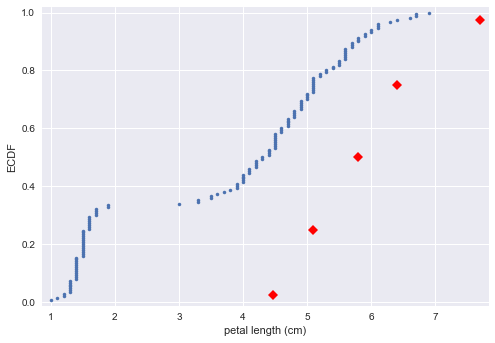

In [12]:
# Create ECDF
x_vers = np.sort(iris['petal_length'])
y_vers = np.arange(1, len(x_vers) + 1) / len(x_vers)


# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentile_list/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


# Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')

In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.

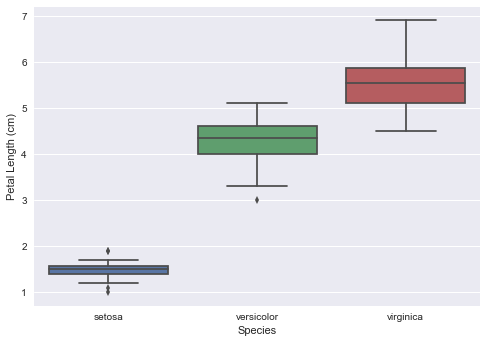

In [13]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal_length', data=iris)

# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()


# Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

In [14]:
versicolor_df = iris[iris['species'] == 'versicolor']
versicolor_petal_length = np.array(versicolor_df['petal_length'].data)
versicolor_petal_width = np.array(versicolor_df['petal_width'].data)

In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.2164 0.2164


# The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))


0.465188133985
0.465188133985


# Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:

_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')

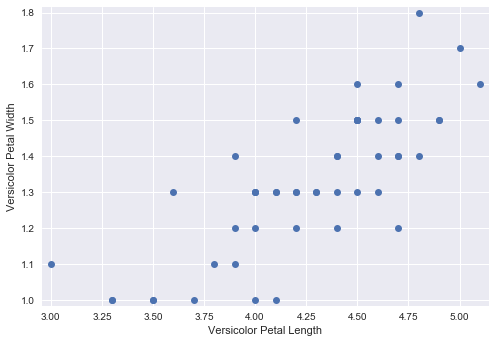

In [17]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='o', linestyle='none')


# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel('Versicolor Petal Length')
plt.ylabel('Versicolor Petal Width')

# Show the result
plt.show()

# Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

### Instructions
* Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
* Print the covariance matrix.
* Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
* Print the covariance.

In [18]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print('Covariance Matrix \n')
print(covariance_matrix)

print('\n ==================================== \n')

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('Petal Length/Width Covariance\n')
print(petal_cov)


Covariance Matrix 

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]


Petal Length/Width Covariance

0.0731020408163


# Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

### Instructions
* Define a function with signature pearson_r(x, y).
 * Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
 * The function returns entry [0,1] of the correlation matrix.
* Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
* Print the result.

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)


0.786668088523
